In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%load_ext lab_black

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as units
import pickle

plt.style.use("mls_scf")

In [2]:
%autoreload 2
import dualpy as dp

In [3]:
x_in = np.arange(100) * units.m
k = 2 * np.pi * units.rad / (25.0 * units.m)
phase = np.linspace(0, 2 * np.pi, 12) * units.rad
phase = dp.seed(phase, "phase")
a = np.array(10.0) * units.K
a = dp.seed(a, "a")
y_in = a * np.sin(k * x_in[:, np.newaxis] + phase[np.newaxis, :])

In [4]:
x_out = 0.5 * (x_in[0::2] + x_in[1::2])

In [5]:
x_out = dp.seed(x_out, "x_out")

In [6]:
interpolator = dp.CubicSplineLinearJacobians(x_in, y_in)

Finally: [100, 12]
Finally: [100, 144]


In [7]:
y_out = interpolator(x_out)

Finally: [600, 1]
Finally: [600, 12]


In [8]:
ja = y_out.jacobians["a"].todensearray()
jp = y_out.jacobians["phase"].todensearray()
jx = y_out.jacobians["x_out"].todensearray()

In [9]:
jpd = jp[:, range(12), range(12)]
jxd = jx[range(50), :, range(50)]

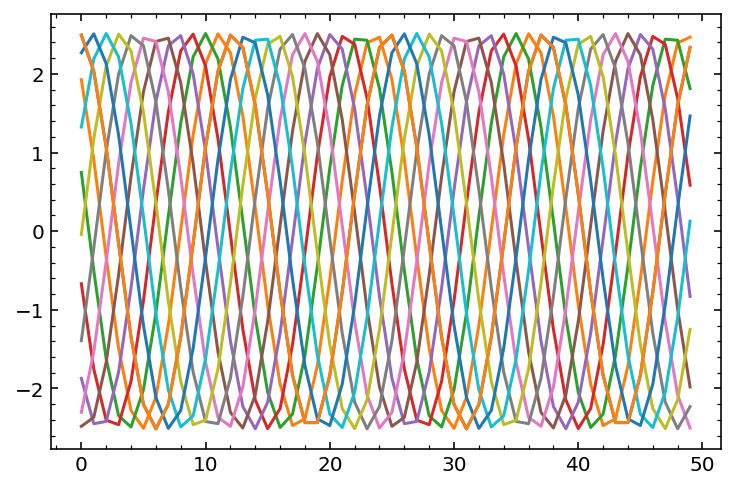

In [10]:
plt.plot(jxd)
plt.show()

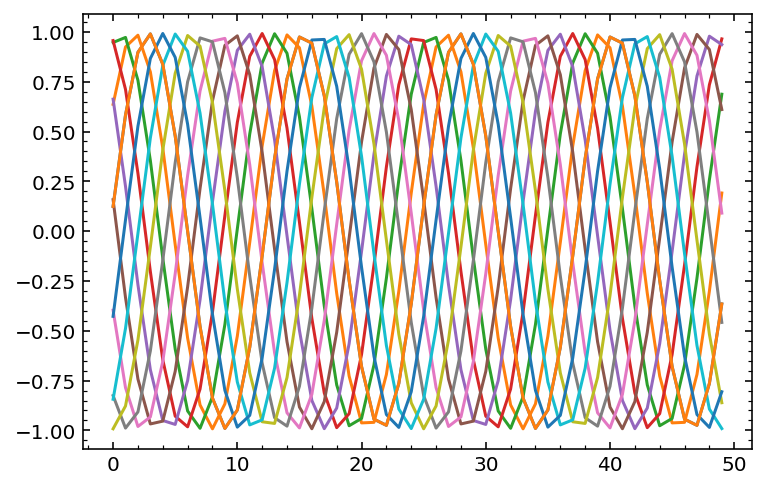

In [12]:
plt.plot(ja)
plt.show()